In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from d2l import torch as d2l


Loading Data

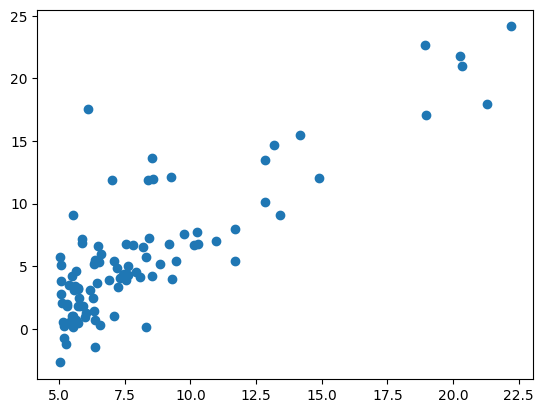

In [48]:
data = pd.read_csv("./data.csv")
plt.scatter(data.x1, data.x2)

In [14]:
def loss_function(m, b, data) -> float:
    total_loss = 0
    for i in range(len(data)):
        x1 = data.x1[i]
        x2 = data.x2[i]
        # Loss function is E = 1/n * sum((y - (mx + b))^2)
        total_loss += (x2 - (m * x1 + b))**2
        return total_loss / float(len(data))

In [15]:
def gradient_descent(m_current, b_current, data, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = len(data)

    for i in range(N):
        # alternatively use data.iloc[i].x1 and data.iloc[i].x2
        x = data.x1[i] 
        y = data.x2[i]
        m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
        b_gradient += -(2/N) * (y - (m_current * x + b_current))

    # update m and b
    m = m_current - (learning_rate * m_gradient)
    b = b_current - (learning_rate * b_gradient)

    return m, b


In [67]:
# test gradient descent
m = 0
b = 0
learning_rate = 0.01
epochs = 1000


In [68]:
m_iter, b_iter, loss_iter = [], [], []
for i in range(epochs):
    m, b = gradient_descent(m, b, data, learning_rate)
    m_iter.append(m)
    b_iter.append(b)
    loss_iter.append(loss_function(m, b, data))
    if i % 1000 == 0:
        print(f"Epoch: {int(i / 1000)}, Loss: {loss_function(m, b, data):.5f}, m: {m:.5f}, b: {b:.5f}")
print(f"m: {m:.5f}, b: {b:.5f}")

Epoch: 0, Loss: 0.92883, m: 1.30658, b: 0.11678
m: 1.18225, b: -3.78842


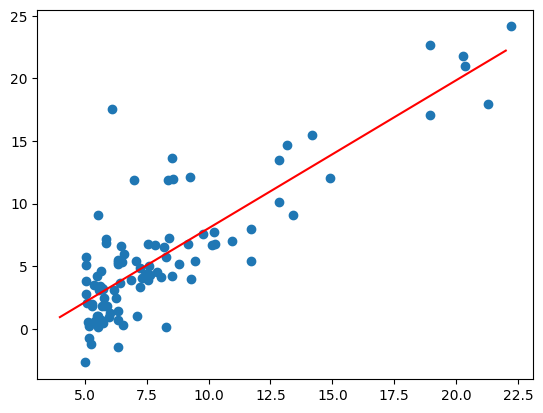

In [69]:
plt.scatter(data.x1, data.x2)
plt.plot(list(range(4, 23)), 
         [m * x + b for x in range(4, 23)], 
         color='red')
plt.show()


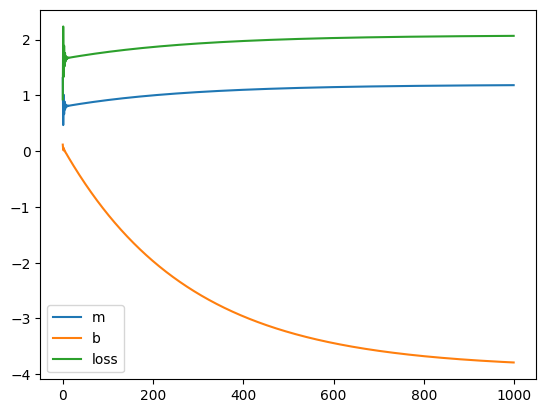

In [70]:
plt.plot(m_iter, label='m')
plt.plot(b_iter, label='b')
plt.plot(loss_iter, label='loss')
plt.legend()
plt.show()